# Read CSV File

* Import CSV File using CSV Module

* Read CSV File and push data to `students_by_groups` dictionary

* `students_by_groups` is a dictionary where its keys are `tutorial_group` columns in the CSV file, while the values are objects of `TutorialGroup` datatype

* The TutorialGroup datatype contains an arrays of `Student` object

* Each `Student` object has the same parameters as the original data

## Example:

If a student has the following format:

```py
{
    'tutorial_group': "G-1",
    'student_id': 5002,
    'school': "CCDS",
    'name': "Aarav Singh",
    'gender': "Male",
    'CGPA': 4.02
}
```

Then the `students_by_groups` would look like this:

```py
students_by_groups = {
    'G-1': TutorialGroup(group_id = 1)
}

students_by_groups['G-1'].students = [
    Student(tutorial_group = 'G-1', student_id = 5002, school='CCDS', name='Aarav Singh', gender='Male', CGPA=4.02)
]
```

## Import required dependencies

In [1]:
import csv # For reading and writing csv files
import math # For ln function we use later
from typing import Dict, List # For type hints
import random # For random number generation

# We will try to construct OOP Classes for better formatting and nested functions

$$\color{green}{\Huge{\textbf{Student class}}}$$

In [2]:
class Student:
    def __init__(self, group_id: str, student_id: int, school: str, name: str, gender: str, CGPA: float = 4.5):
        self.group_id = group_id
        self.student_id = student_id
        self.school = school
        self.name = name
        self.gender = gender
        self.cgpaaa = CGPA

    def __str__(self):
        return f"{self.student_id} {self.school} {self.name} {self.gender} {self.cgpa}"

$$\color{green}{\Huge{\textbf{Tutorial Group Class}}}$$

In [3]:
class TutorialGroup:
    def __init__(self, group_id: int):
        self.group_id = group_id
        self.students = []

    def __str__(self):
        return f"{self.group_id}:\n{[str(student) for student in self.students]}"

    def add_student(self, student: Student):
        self.students.append(student)

## Read and store data

In [4]:
students_by_groups: Dict[str, TutorialGroup] = {

}

students_by_id: Dict[str, Student] = {

}

def load_csv():
    global students_by_groups
    global students_by_id
    students_by_groups = {}
    students_by_id = {}
    with open('records.csv', mode='r') as file:
        # Create a CSV reader
        csv_reader = csv.reader(file)
        next(csv_reader)

        # Append students to corresponding tutorial groups
        for row in csv_reader:

            tutorial_group = row[0]
            student_id = int(row[1])  # Convert to int
            school = row[2]
            name = row[3]
            gender = row[4]
            cgpa = float(row[5])  # Convert to float

            if tutorial_group not in students_by_groups:
                students_by_groups[tutorial_group] = TutorialGroup(tutorial_group)

            students_by_id[str(student_id)] = Student(tutorial_group, student_id, school, name, gender, cgpa)
            students_by_groups[tutorial_group].add_student(Student(tutorial_group, student_id, school, name, gender, cgpa))

load_csv()

# Diversity Score Calculation

The diversity score of a group is the sum of diversity score for each pair of student within a group

Each student can be characterised by 3 parameters:

- School

- Gender

- CGPA

## Formula

We can define the diversity score for each pair of students $A$ and $B$ as the distance between $A(school_A, gender_A, cgpa_A)$ and $B(school_B, gender_B, cgpa_B)$:

$$
d(A, B) = \sqrt{\text{diff}(school_A, school_B)^2 + \text{diff}(gender_A, gender_B)^2 + \text{diff}(cgpa_A, cgpa_B)^2 }
$$

### Difference of school

The difference of school between 2 students can be fixed into a constant:

- If the schools are similar, then the difference is 0

- If the schools are different, then the difference is set to a constant $w_s$

### Difference of gender

The difference of gender between 2 studenst can also be formulated in the same way as the difference of school:

- If the genders are similar, then the difference is 0

- If the genders are similar, then the difference is set to a constant $w_g$

### Different of CGPA

In basic case, we can use linear difference and add it to the sum of diverse score:

$$ \text{diff}_{cgpa} = |cgpa_A - cgpa_B| $$

However, as the weight of $|cgpa_A - cgpa_{B}|$ is purely based on the difference between 2 values, it may outweigh the scores of genders and school. To standardize, first need to normalise the $\text{diff}_{CGPA}$ by dividing it to the maximum distance obtainable $max_{CGPA} - min_{CGPA}$ of the whole tutorial group consisting of 50 people.

Let $d$ be the output after normalisation:

$$d_{cgpa} = \frac{\text{diff}_{cgpa}}{max_{cgpa} - min_{cgpa}} = \frac{|cgpa_A - cgpa_B|}{max_{cgpa} - min_{cgpa}} $$

Also, we notice that the whole average CGPA of a team should be as close as the whole group average CGPA as possible. Let $$ \text{diff}_{avg} = |avg_{team} - avg_{group}| $$

And we need to standardise the value as well:

$$d_{avg} = \frac{\text{diff}_{avg}}{max_{cgpa} - min_{cgpa}} = \frac{|avg_{team} - avg_{group}|}{max_{cgpa} - min_{cgpa}} $$

Notice how we have 2 priorities here:

- Maximising $|d_{cgpa}|$

- Minimising $|d_{avg}|$

We already know that $|d_{cgpa}|$ and $|d_{avg}|$ have ranges within 0 to 1. So we will calculate

$$d_{cgpa} - d_{avg} + 1$$

We add 1 to ensure that the result ranges from 0 to 2.

After plotting for a while, we notice that the $d_{cpga}$ generally has larger value than $d_{avg}$, as the difference between 2 members is obviously always larger than the difference between team CGPA and group CGPA

This causes the data has higher chance to be > 1 than < 1, which is the balance.

To mitigate, we add the weight 0.5 for $d_{cgpa}$ and 1.5 for $d_{cgpa}$. We also needs to change adding 1 to 1.5 to ensure the result ranging from 0 to 2

Here, the frequency is balance with around 1.5 as the median. We still need to standardise the data so we divide by 3 and multiply by 2 so the distribution has median around 1. The final function is:

$$ \text{diff}_{cgpa} = \frac{2}{3} (0.5 * d_{cgpa} - 1.5 * d_{avg} + 1.5) $$

Where $w_{c}$ is the weight of the CGPA to other parameters


### $\color{red}{\text{Note}}$

One important consideration to mind is the weight of each parameter. For example, since there are only 2 genders <b>Male</b> and <b>Female</b>, the difference between genders of two students should be weighted less (e.g: The other params can be calculated as normal, but this should only be 0 if similar and 0.5 if different).

## Calculating the difference between each pair of students

- We will first re-write our `TutorialGroup` class to include `get_max_cgpa` and `get_min_cpa` functions

- We will also re-rewrite our `Student` class to include `team_id`

- Also, we will also create a new class named `TeamGroup` to handle each team for students after being assigned. We will also construct the diversity score function for each TeamGroup using the `diff` function we defined above

- The time complexity for a calculation hence is $O(n^2)$, where $n$ is the number of students inside a team

In [5]:
class Student:

    def __init__(self, group_id: str, student_id: int, school: str, name: str, gender: str, cgpa: float):
        self.group_id = group_id
        self.team_id = 0 # Not set yet
        self.student_id = student_id
        self.school = school
        self.name = name
        self.gender = gender
        self.cgpa = cgpa

    def assign_team(self, team_id: int):
        self.team_id = team_id

    def __str__(self):
        return f"{self.student_id} {self.school} {self.name} {self.gender} {self.cgpa} {self.team_id}"


$$\color{green}{\Huge{\textbf{Team Group Class}}}$$

In [6]:
class TeamGroup:
    def __init__(self, team_id: int, group_id: int):
        self.group_id = group_id
        self.team_id = team_id
        self.students = []

    def __str__(self):
        return f"{self.group_id}:\n{[str(student) for student in self.students]}"

    def add_student(self, student: Student):
        self.students.append(student)
    def get_average_cgpa(self):
        return sum([student.cgpa for student in self.students]) / len(self.students)

In [7]:
class TutorialGroup:
    def __init__(self, group_id: int):
        self.group_id = group_id
        self.students = []
        self.min_cpga = 0
        self.max_cpga = 0
        self.avg_cpga = 0
        self.students_by_teams: Dict[int, TeamGroup] = {}

    def __str__(self):
        return f"{self.group_id}:\n{[str(student) for student in self.students]}"

    def add_student(self, student: Student):
        self.students.append(student)

    def get_max_cgpa(self):
        if (self.max_cpga != 0):
            return self.max_cpga
        self.max_cpga = 0
        for student in self.students:
            if student.cgpa > self.max_cpga:
                self.max_cpga = student.cgpa
        return self.max_cpga

    def get_min_cgpa(self):
        if (self.min_cpga != 0):
            return self.min_cpga
        self.min_cpga = 5
        for student in self.students:
            if student.cgpa < self.min_cpga:
                self.min_cpga = student.cgpa
        return self.min_cpga
    
    def get_avg_cgpa(self):
        if (self.avg_cpga != 0):
            return self.avg_cpga
        self.avg_cpga = sum([student.cgpa for student in self.students]) / len(self.students)
        return self.avg_cpga


## Re-read the data to match with the current construction of class

In [8]:
load_csv()

### Difference Function

In [137]:
diff_cgpa = []
diff_result = []
impact = []

def diff(A: Student, B: Student, w_s: float, w_g: float, w_c: float) -> float:
    # A and B are in the same team and group
    res = 0
    # If the school is not the same, then add w_s^2 to the result
    if A.school != B.school:
        res += w_s * w_s
    # If the gender is not the same, then add w_g^2 to the result
    d_gender = 0
    if A.gender != B.gender:
        d_gender = w_g * w_g
    elif A.gender == B.gender and A.gender == "Female":
        d_gender += w_g * w_g / 4

    # CGPA Diversity Score
    Group: TutorialGroup = students_by_groups[A.group_id]
    
    d_cgpa = abs(A.cgpa - B.cgpa) / (Group.get_max_cgpa() - Group.get_min_cgpa())
    d_avg = 0
    # CGPA Mean Score
    if A.team_id and A.team_id in Group.students_by_teams:
        Team: TeamGroup = Group.students_by_teams[A.team_id]

        avg_team = Team.get_avg_cgpa()
        avg_group = Group.get_avg_cgpa()
        d_avg = abs(avg_team - avg_group) / (Group.get_max_cgpa() - Group.get_min_cgpa())
    else:
        d_avg = 0

    diff = d_cgpa * 0.5 - d_avg * 1.5 + 1.5
    diff /= 3 / 2
    diff *= w_c
    diff_cgpa.append(diff)
    res = res + d_gender * d_gender + diff * diff
    diff_result.append(math.sqrt(res))
    impact.append((diff * diff, res))
    return math.sqrt(res)

A = students_by_id['5002']
B = students_by_id['3838']
C = students_by_id['4173']
D = students_by_id['615']
print(A)
print(B)
dAB = diff(A, B, 1, 1, 1)
print(dAB)
print(C)
print(D)
dCD = diff(C, D, 1, 1, 1)
print(dCD)
print(dAB > dCD)


5002 CCDS Aarav Singh Male 4.02 0
3838 EEE Aarti Nair Female 4.05 0
1.740710634491516
4173 SBS Evelyn Cheung Female 4.48 0
615 SPMS Gia Tsai Female 3.89 0
1.6540029958406204
True


# Matching Algorithm

## Basic Algorithm

The most obvious algorithm we can do here is dividing students into groups in a randomise way. Note that we don't need to pick student randomly each time from the list. Instead, we can shuffle the order of the list then pick students in normal order. That way, it still preserves the random characteristic.

- We need to reinitialise `TutorialGroup` class to add functions `assign_group` and `shuffle`

In [140]:
class TeamGroup:
    def __init__(self, team_id: int, group_id: int):
        self.group_id = group_id
        self.team_id = team_id
        self.students = []

    def __str__(self):
        return f"{self.group_id}:\n{[str(student) for student in self.students]}"

    def add_student(self, student: Student):
        self.students.append(student)
    def get_avg_cgpa(self):
        return sum([student.cgpa for student in self.students]) / len(self.students)
    def diversity_score(self):
        score = 0
        for i in range(len(self.students)):
            for j in range(i + 1, len(self.students)):
                score += diff(self.students[i], self.students[j], 0.5, 0.5, 1)
        return score

In [133]:
class TutorialGroup:
    def __init__(self, group_id: int):
        self.group_id = group_id
        self.students_by_teams: Dict[int, TeamGroup] = {}
        self.students = []
        self.min_cpga = 0
        self.max_cpga = 0
        self.avg_cpga = 0

    def __str__(self):
        return f"{self.group_id}:\n{[str(student) for student in self.students]}"

    def add_student(self, student: Student):
        self.students.append(student)

    def get_max_cgpa(self):
        if (self.max_cpga != 0):
            return self.max_cpga
        self.max_cpga = 0
        for student in self.students:
            if student.cgpa > self.max_cpga:
                self.max_cpga = student.cgpa
        return self.max_cpga

    def get_min_cgpa(self):
        if (self.min_cpga != 0):
            return self.min_cpga
        self.min_cpga = 10
        for student in self.students:
            if student.cgpa < self.min_cpga:
                self.min_cpga = student.cgpa
        return self.min_cpga
    
    def get_avg_cgpa(self):
        if (self.avg_cpga != 0):
            return self.avg_cpga
        self.avg_cpga = sum([student.cgpa for student in self.students]) / len(self.students)
        return self.avg_cpga

    def shuffle(self):
        random.shuffle(self.students)

    def assign_group(self, max_pax: int):
        self.shuffle()
        self.max_cpga = 0
        self.min_cpga = 0
        self.students_by_teams = {}
        for i in range(0, len(self.students), max_pax):
            team_id = i // max_pax + 1
            self.students_by_teams[team_id] = TeamGroup(team_id, self.group_id)
            for j in range(i, i + max_pax):
                if j < len(self.students):
                    self.students[j].team_id = team_id
                    self.students_by_teams[team_id].add_student(self.students[j])
                else:
                    break

## Re-read data to match new constructions of classes

In [134]:
load_csv()

## Testing

Mean:  11.271419198688093
24000


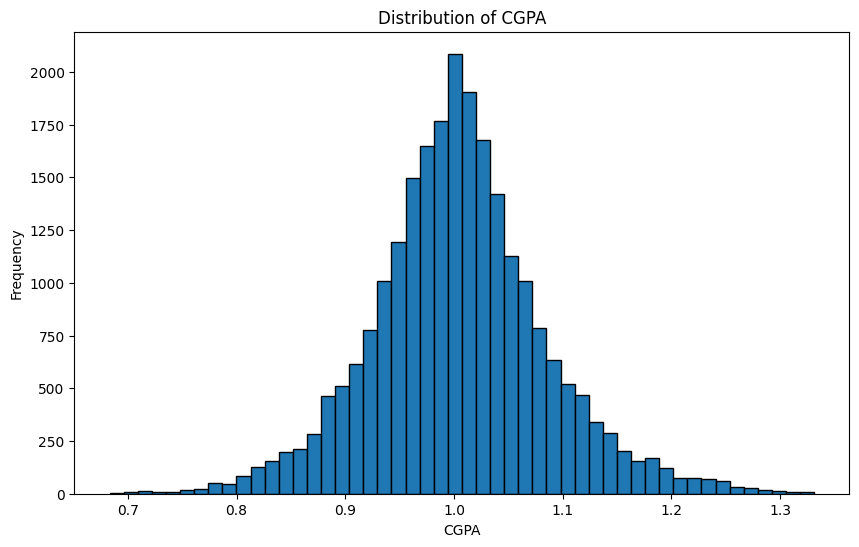

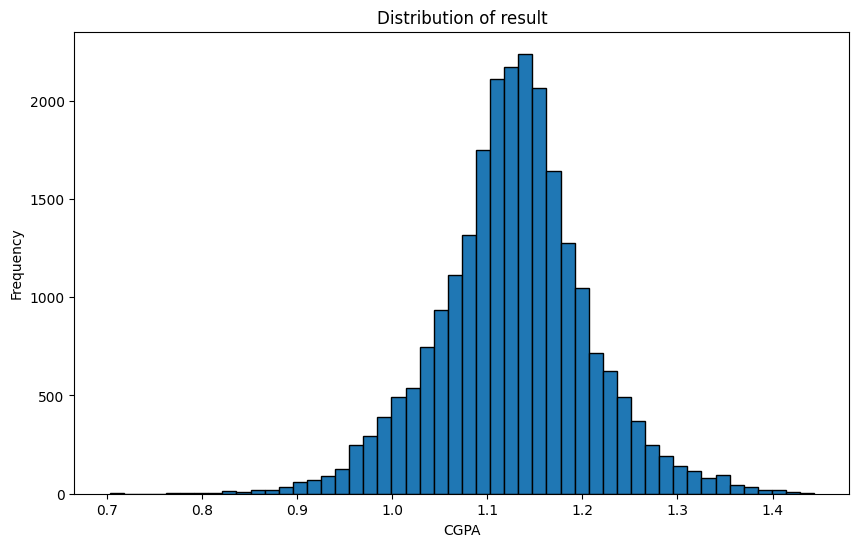

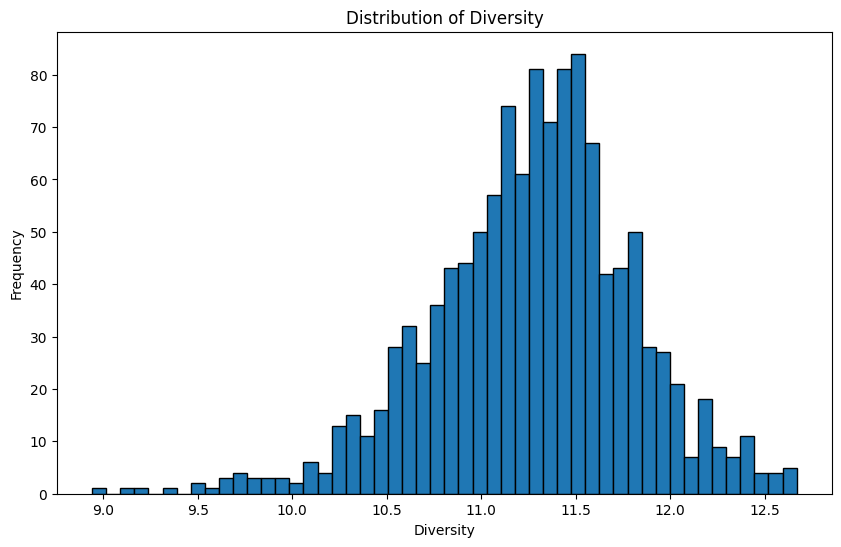

In [141]:
group1 = students_by_groups['G-1']

mean = 0

import matplotlib.pyplot as plt

diff_cgpa = []
diff_result = []
impact = []
diversity = []
team_cnt = 0
for group in students_by_groups.values():
    group.assign_group(5)        
    team_cnt += 50 / 5
    for team in group.students_by_teams.values():

        diversity.append(team.diversity_score())
        mean += team.diversity_score()
        

print("Mean: ", mean / team_cnt)
print(len(diff_cgpa))

# Plotting the distribution of d_cgpa
plt.figure(figsize=(10, 6))
plt.hist(diff_cgpa, bins=50, edgecolor='black')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of d_cgpa
plt.figure(figsize=(10, 6))
plt.hist(diff_result, bins=50, edgecolor='black')
plt.title('Distribution of result')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of diversity
plt.figure(figsize=(10, 6))
plt.hist(diversity, bins=50, edgecolor='black')
plt.title('Distribution of Diversity')
plt.xlabel('Diversity')
plt.ylabel('Frequency')
plt.show()






# Todo: Local Search || Tabu Search